In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.formula.api import ols
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from math import sqrt

import scipy, matplotlib
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

mainData = pd.read_csv('clean_filter_dataframe.csv')
sb.set() # set the default Seaborn style for graphics
mainData.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,...,Fighting,Misc,Platform.1,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
count,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,...,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000
mean,2007.369579,0.260723,0.139294,0.037282,0.048949,0.486453,70.496872,28.914995,7.216677,129.731607,...,0.058252,0.055016,0.061704,0.012945,0.075944,0.083495,0.115426,0.041640,0.163970,0.037972
std,4.069156,0.276439,0.183665,0.117220,0.068543,0.465979,12.903368,18.224541,1.381018,426.797953,...,0.234245,0.228036,0.240644,0.113049,0.264937,0.276659,0.319570,0.199786,0.370288,0.191149
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,21.000000,3.000000,0.500000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,0.070000,0.020000,0.000000,0.010000,0.140000,63.000000,15.000000,6.500000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.160000,0.060000,0.000000,0.020000,0.320000,72.000000,25.000000,7.500000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2010.000000,0.360000,0.190000,0.010000,0.060000,0.690000,80.000000,40.000000,8.200000,77.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2016.000000,1.820000,1.580000,1.490000,1.180000,2.070000,98.000000,106.000000,9.600000,10665.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\user\AppData\Local\Temp/ipykernel_19872/1988189170.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x, y)


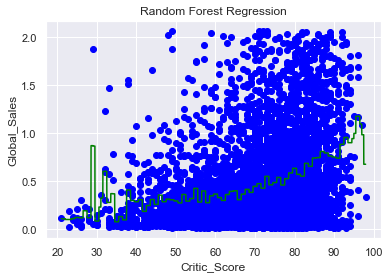

In [3]:
x = np.array(mainData['Critic_Score']).reshape(-1, 1)
y = np.array(mainData['Global_Sales']).reshape(-1, 1)

from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(x, y) 
Y_pred = regressor.predict(np.array([6.5]).reshape(1, 1))  # test the output by changing values

# Visualising the Random Forest Regression results
# arrange for creating a range of values
# from min value of x to max
# value of x with a difference of 0.01
# between two consecutive values
X_grid = np.arange(min(x), max(x), 0.01)
 
# reshape for reshaping the data into a len(X_grid)*1 array,
# i.e. to make a column out of the X_grid value                 
X_grid = X_grid.reshape((len(X_grid), 1))
 
# Scatter plot for original data
plt.scatter(x, y, color = 'blue') 
 
# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid),
         color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Critic_Score')
plt.ylabel('Global_Sales')
plt.show()